<a href="https://colab.research.google.com/github/wcharlesknight/Analysis_Index_Asset_Flows/blob/master/Final_Project_Charlie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
import pandas as pd
import os
import decimal
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)




# I uploaded as an excel file since it did not upload '%'
df = pd.read_excel('Final Project.xlsx')

# First I needed to turn all decimals into whole percentages 
df['US Fixed Income'] = df['US Fixed Income'].apply(lambda x: x*100) 
df['US Equity'] = df['US Equity'].apply(lambda x: x*100)
df['EU Equity'] = df['EU Equity'].apply(lambda x: x*100)
df['EU Fixed Income'] = df['EU Fixed Income'].apply(lambda x: x*100)
df['China Equity'] = df['China Equity'].apply(lambda x: x*100)
df['China Fixed Income'] = df['China Fixed Income'].apply(lambda x: x*100)
df['MSCI ACWI'] = df['MSCI ACWI'].apply(lambda x: x*100)
df['Bloomberg Agg'] = df['Bloomberg Agg'].apply(lambda x: x*100)
df['MSCI Euro '] = df['MSCI Euro '].apply(lambda x: x*100)
df['MSCI China  '] = df['MSCI China'].apply(lambda x: x*100)
df['S&P 500'] = df['S&P 500'].apply(lambda x: x*100)


print(df) 


      Date  US Fixed Income  EU Equity  ...  MSCI China  S&P 500  MSCI China  
0   Dec-19         1.812968  -2.920170  ...    0.147126   9.0700       14.7126
1   Sep-19         1.306210  -3.017328  ...   -0.047290   1.6983       -4.7290
2   Jun-19         0.823038  -3.640569  ...   -0.040158   4.3038       -4.0158
3   Mar-19         0.889288  -4.953785  ...    0.176914  13.6480       17.6914
4   Dec-18        -0.417358  -1.820014  ...   -0.107311 -13.5198      -10.7311
5   Sep-18         1.264494  -1.862680  ...   -0.075081   7.7108       -7.5081
6   Jun-18        -0.178582  -4.377317  ...   -0.035021   3.4339       -3.5021
7   Mar-18         0.348972  -0.195834  ...    0.018190  -0.7591        1.8190
8   Dec-17         1.495149  -0.121436  ...    0.076166   6.6448        7.6166
9   Sep-17         1.869558   0.925577  ...    0.146562   4.4804       14.6562
10  Jun-17         0.851121   0.549529  ...    0.105715   3.0882       10.5715
11  Mar-17         0.753064  -3.306551  ...    0.129

In [225]:
# Create Asset dataframe and index dataframe to use later

us_data = df[['Date','US Equity','US Fixed Income','S&P 500']]
asset_flows = df[['Date','US Equity','US Fixed Income','EU Equity','EU Fixed Income','China Equity','China Fixed Income']]
indices = df[['Date','MSCI ACWI','Bloomberg Agg','MSCI Euro ','MSCI China  ','S&P 500']]


# works by taking observations that are spread across columns,
# and melting them down into one column with multiple rows.
melted_flows = pd.melt(asset_flows,id_vars=['Date'],var_name='Strategies')
melted_us_data = pd.melt(us_data, id_vars=['Date'], var_name='Asset')

# frame = { 'Author': auth_series, 'Article': article_series } 
  
# result = pd.DataFrame(frame) 

d = us_data['Date']
s = us_data['S&P 500']
sp = pd.Series(s)
dp = pd.Series(d)
cumsu = sp.cumsum() 
cumu = {'Date' : dp, 'S&P 500': cumsu}

cumulative_sp500 = pd.DataFrame(cumu)
cumulative_sp500["Date"] = cumulative_sp500["Date"].values[::-1]
print(cumulative_sp500)




      Date   S&P 500
0   Jun-05    9.0700
1   Sep-05   10.7683
2   Dec-05   15.0721
3   Mar-06   28.7201
4   Jun-06   15.2003
5   Sep-06   22.9111
6   Dec-06   26.3450
7   Mar-07   25.5859
8   Jun-07   32.2307
9   Sep-07   36.7111
10  Dec-07   39.7993
11  Mar-08   45.8654
12  Jun-08   49.6896
13  Sep-08   53.5417
14  Dec-08   55.9969
15  Mar-09   57.3447
16  Jun-09   64.3873
17  Sep-09   57.9489
18  Dec-09   58.2270
19  Mar-10   59.1776
20  Jun-10   64.1103
21  Sep-10   65.2382
22  Dec-10   70.4720
23  Mar-11   72.2795
24  Jun-11   82.7924
25  Sep-11   88.0374
26  Dec-11   90.9475
27  Mar-12  101.5529
28  Jun-12  101.1757
29  Sep-12  107.5272
30  Dec-12  104.7755
31  Mar-13  117.3621
32  Jun-13  129.1785
33  Sep-13  115.3105
34  Dec-13  115.4097
35  Mar-14  121.3291
36  Jun-14  132.0856
37  Sep-14  143.3798
38  Dec-14  131.9546
39  Mar-15  137.3411
40  Jun-15  143.3797
41  Sep-15  158.9856
42  Dec-15  174.9147
43  Mar-16  163.9029
44  Jun-16  141.9596
45  Sep-16  133.5897
46  Dec-16  1

In [13]:
# Organize the different columns to easily read and call them

# Name all of the indices
world_stock_index = df['MSCI ACWI']
fixed_income_index = df['Bloomberg Agg']
usequity_index = df['S&P 500']
chinaequity_index = df['MSCI China  ']
euequity_index = df['MSCI Euro ']

# Name all of the asset flows
us_equity_flows = df['US Equity']
us_fi_flows = df['US Fixed Income']
china_equity_flows = df['China Equity']
china_fi_flows = df['China Fixed Income']
eu_fi_flows = df['EU Fixed Income']
eu_equity_flows = df['EU Fixed Income']

# Measure sums of asset flows
cumulative_china_equity = china_equity_flows.sum()
cumulative_us_equity = us_equity_flows.sum() 
cumulative_eu_equity = eu_equity_flows.sum()
cumulative_china_fi = china_fi_flows.sum()
cumulative_us_fi = us_fi_flows.sum()
cumulative_eu_fi = eu_fi_flows.sum()

print('Equity Strategies 2005-2019 \n')

print(f'The net percentage flow of all US Equity is {cumulative_us_equity}%')
print(f'The net percentage flow of all Chinese Equity is {cumulative_china_equity}%')
print(f'The net percentage flow of all EU Equity is {cumulative_eu_equity}% \n')

print('Fixed Income Strategies 2005-2019 \n')

print(f'The net percentage flow of all US Fixed Income is {cumulative_us_fi}%')
print(f'The net percentage flow of all China Fixed Income is {cumulative_china_fi}%')
print(f'The net percentage flow of all EU Fixed Income is {cumulative_eu_fi}%')

Equity Strategies 2005-2019 

The net percentage flow of all US Equity is -45.16148012873901%
The net percentage flow of all Chinese Equity is 110.4553795978673%
The net percentage flow of all EU Equity is 101.74032516371462% 

Fixed Income Strategies 2005-2019 

The net percentage flow of all US Fixed Income is 43.3596498514872%
The net percentage flow of all China Fixed Income is 174.3302075965906%
The net percentage flow of all EU Fixed Income is 101.74032516371462%


In [14]:
# Look at average return of indices 

average_world_stock = world_stock_index.mean()
average_world_fi = fixed_income_index.mean()
average_us_stock = usequity_index.mean()
average_china_stock = chinaequity_index.mean()
average_eu_stock = euequity_index.mean()


print('Average Returns of Indices 2005-2019 \n')
print(f'The average return of the MSCI world equity index is {average_world_stock}%')
print(f'The average return of the Bloomberg Agg world fixed income index is {average_world_fi}%')
print(f'The average return of the S&P 500 US equity index is {average_us_stock}%')
print(f'The average return of the MSCI China equity index is {average_china_stock}%')
print(f'The average return of the MSCI Euro equity index is {average_eu_stock}%')


Average Returns of Indices 2005-2019 

The average return of the MSCI world equity index is 1.5253305084745763%
The average return of the Bloomberg Agg world fixed income index is 0.8689271186440677%
The average return of the S&P 500 US equity index is 2.5292644067796615%
The average return of the MSCI China equity index is 3.5611525423728816%
The average return of the MSCI Euro equity index is 1.5421118644067797%


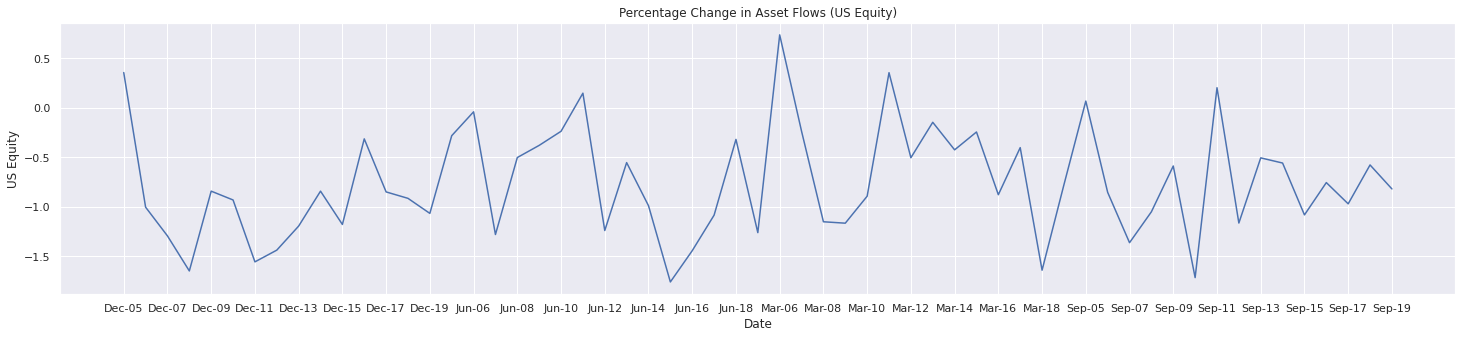

In [106]:

fig, (ax1) = plt.subplots(ncols=1, figsize=(25, 5)) #Used Matplot to adjust the size
us = sns.lineplot(x='Date', y='US Equity', data=df, ci=None, ax=ax1)

us.tick_params(labelsize=11) #set tick font size
xticks = us.xaxis.get_major_ticks() # This is to make the x-axis labels readable
for i in range(len(xticks)):
    if i%2==1:
        xticks[i].set_visible(False)
plt.title('Percentage Change in Asset Flows (US Equity)')

# Customize y-axis label
plt.ylabel('US Equity')
plt.show()

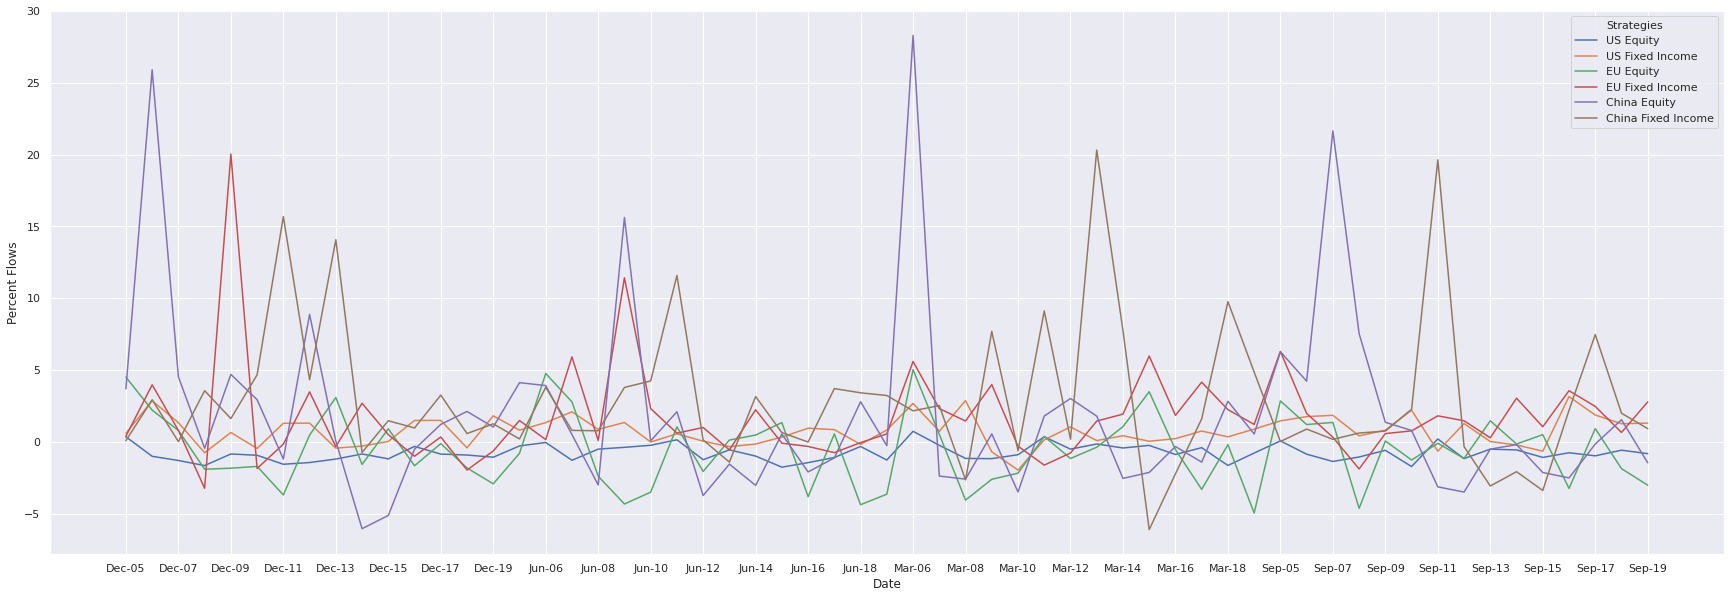

In [187]:
# Plot all the asset flows together 

fig, (ax2) = plt.subplots(ncols=1, figsize=(30, 10))
all_flows = sns.lineplot(x='Date', y='value', hue='Strategies',data=melted_flows, ax=ax2) #use the melted flow df to make a line plot of all asset flows


all_flows.set(xlabel='Date', ylabel='Percent Flows')

all_flows.tick_params(labelsize=11) #set tick font size
ticks = all_flows.xaxis.get_major_ticks() # This is to make the x-axis labels readable
for i in range(len(ticks)):
    if i%2==1:
        ticks[i].set_visible(False)

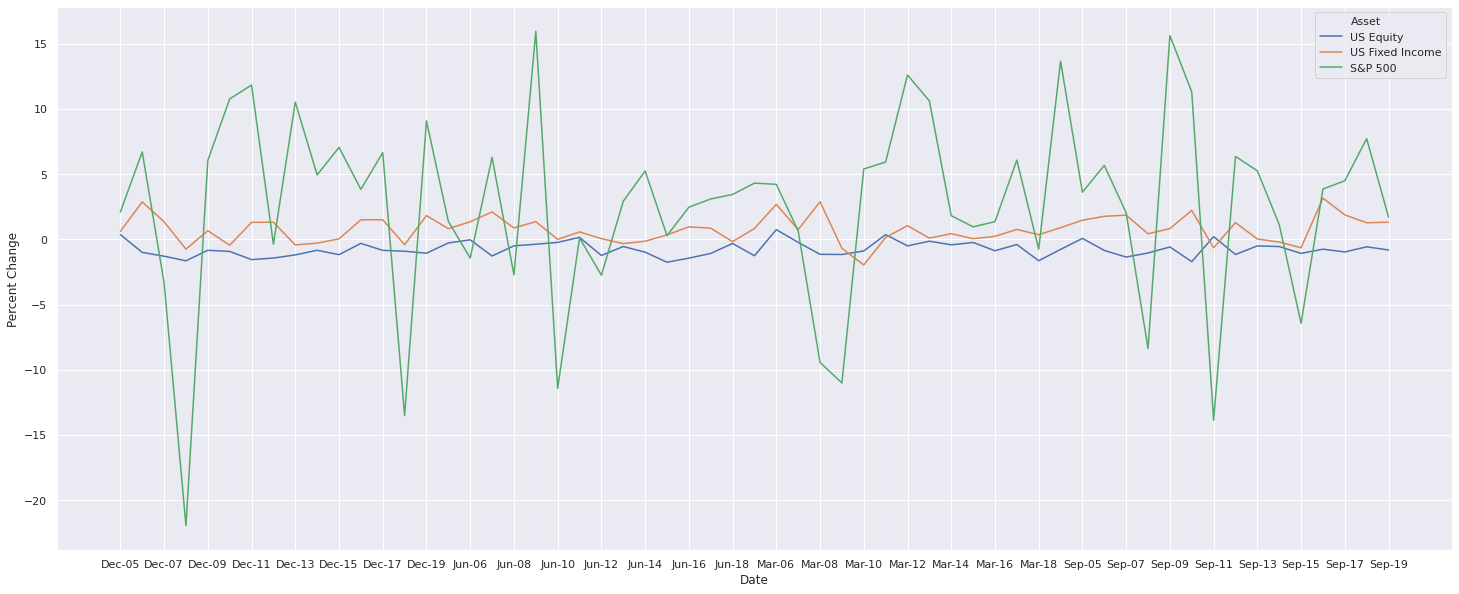

In [188]:
# A look at any correlation among US asset flows and index returns

fig, (ax3) = plt.subplots(ncols=1, figsize=(25, 10))
flow_index = sns.lineplot(x='Date', y='value', hue='Asset',data=melted_us_data, ax=ax3) #use the melted flow df to make a line plot of all asset flows


flow_index.set(xlabel='Date', ylabel='Percent Change')

flow_index.tick_params(labelsize=11) #set tick font size
fticks = flow_index.xaxis.get_major_ticks() # This is to make the x-axis labels readable
for i in range(len(fticks)):
    if i%2==1:
        fticks[i].set_visible(False)

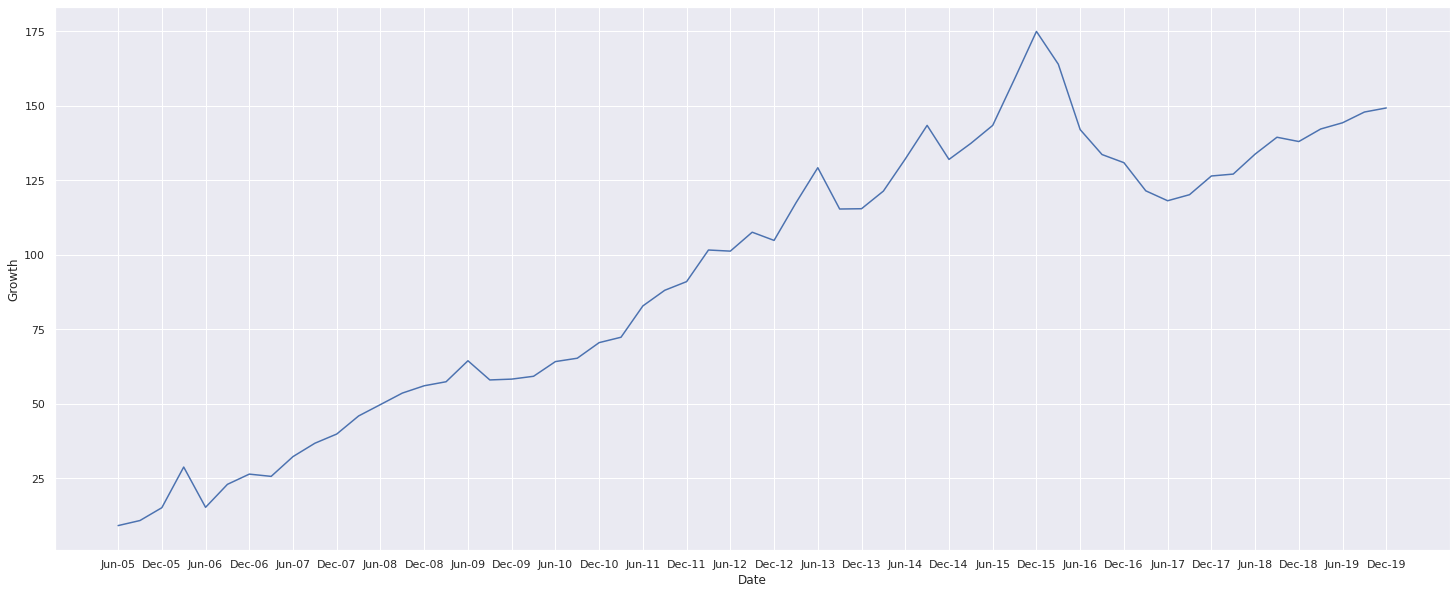

In [240]:
fig, (ax4) = plt.subplots(ncols=1, figsize=(25, 10))
index_returns = sns.lineplot(x="Date", y="S&P 500", data=cumulative_sp500, ax=ax4, sort=False) 

index_returns.set(xlabel='Date', ylabel='Growth')

index_returns.tick_params(labelsize=11) #set tick font size
eticks = index_returns.xaxis.get_major_ticks() # This is to make the x-axis labels readable
for i in range(len(eticks)):
  if i%2==1:
    eticks[i].set_visible(False)



